## Import Packages

In [7]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## Prepare the dataset

In [8]:
data = pd.read_csv("Salary_dataset.csv")
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
data = data.drop("Unnamed: 0", axis=1)
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [10]:
X = data["YearsExperience"].values
y = data["Salary"].values

print(X.shape, y.shape)

(30,) (30,)


## Batch Gradient Descent

In [11]:
def GD(X, y, lr=0.001, epochs=1000, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    for i in range(epochs + 1):
        y_hat = theta0 + theta1 * X
        m = X.shape[0]

        cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
        grad0 = 1 / m * np.sum(y_hat - y)
        grad1 = 1 / m * np.sum((y_hat - y) * X)

        if show_progress:
            print(f"Epoch {i}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        theta0 -= lr * grad0
        theta1 -= lr * grad1

        theta0s.append(theta0)
        theta1s.append(theta1)
        costs.append(cost)

        ss_res = np.sum((y - y_hat) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score*100)

        if convergence and i > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = i

    return history

In [12]:
history = GD(X, y, lr=0.0001, epochs=1000, convergence=1e-4, show_progress=False)

In [13]:
history["scores"][-1]

80.62590430013825

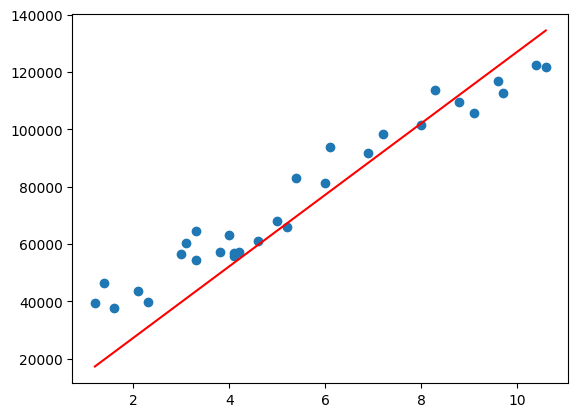

In [14]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

#### Score & loss vs. epochs

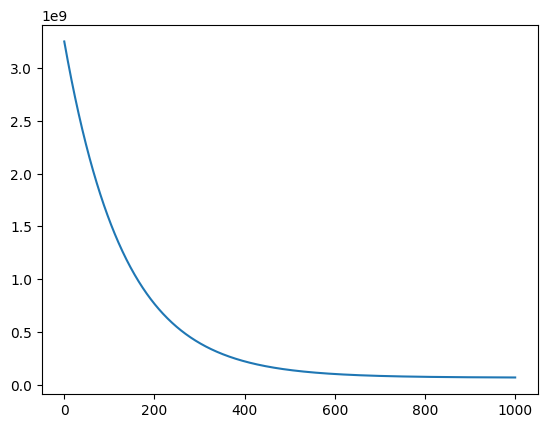

In [15]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )
plt.show()

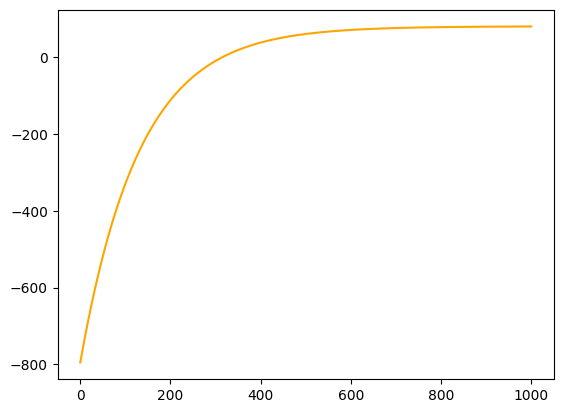

In [16]:
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.show()

#### Theta_0 vs. loss and Theta_1 vs. loss

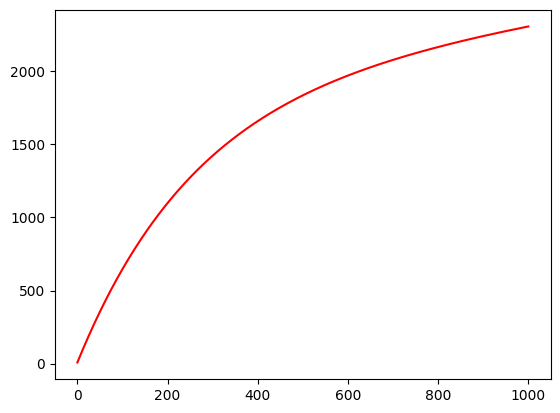

In [17]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

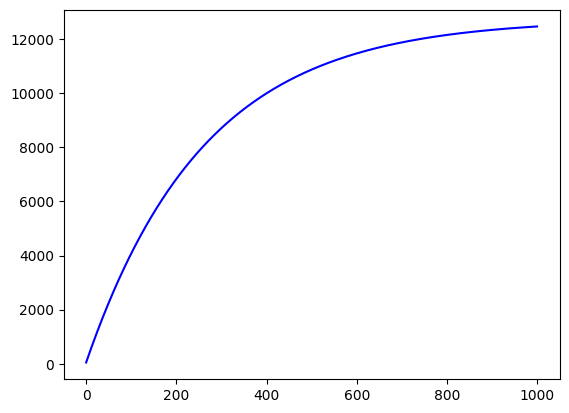

In [18]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

#### All regression lines till converge

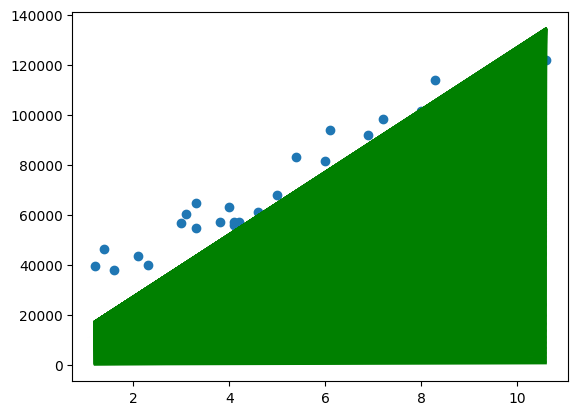

In [19]:
for i in range(epochs.shape[0]):
    y_hat = history["theta0s"][i] + history["theta1s"][i] * X
    plt.plot(X,y_hat, color = "green")
plt.scatter(X,y)
plt.show()

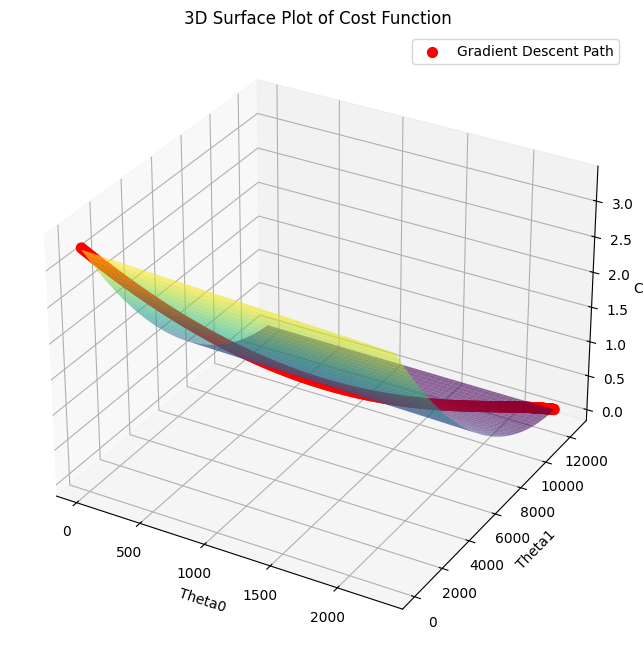

In [20]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

## Mini-Batch GD


In [21]:
def mini_batch_GD(X, y, batch_size = 10, lr=0.001, epochs=1000, show_progress=True, convergence=1e-4):
    theta0 = theta1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    m = X.shape[0]
    for epoch in range(epochs + 1):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            y_hat = theta0 + theta1 * X

            cost = 1 / (2 * m) * np.sum((y_hat - y) ** 2)
            grad0 = 1 / m * np.sum(y_hat - y)
            grad1 = 1 / m * np.sum((y_hat - y) * X)

            theta0 -= lr * grad0
            theta1 -= lr * grad1
        
        y_hat_batch = theta0 + theta1 * X
        cost = 1 / (2 * m) * np.sum((y_hat_batch - y) ** 2)
        costs.append(cost)
        
        if show_progress:
            print(f"Epoch {epoch}: Cost = {cost}, grad0 = {grad0}, grad1 = {grad1}")
            print("---------------------------------------------------------------------")

        ss_res = np.sum((y - y_hat_batch) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score*100)

        theta0s.append(theta0)
        theta1s.append(theta1)

        if convergence and epoch > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break


    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = epoch

    return history

In [22]:
history = mini_batch_GD(X, y, batch_size = 10, lr=0.0001, epochs=1000, show_progress=False)

In [23]:
history["scores"][-1]

82.22396452434967

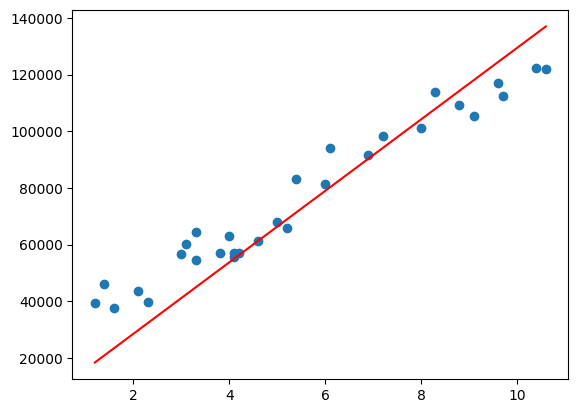

In [24]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

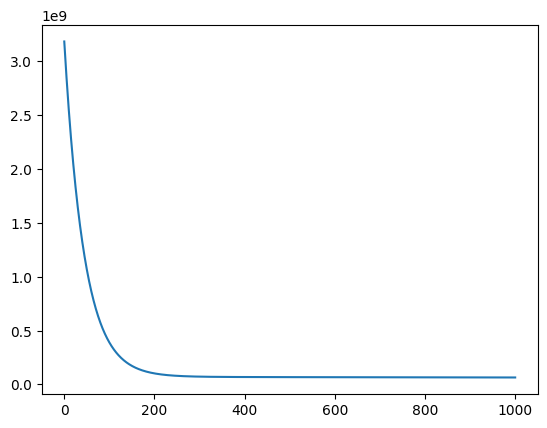

In [25]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )
plt.show()

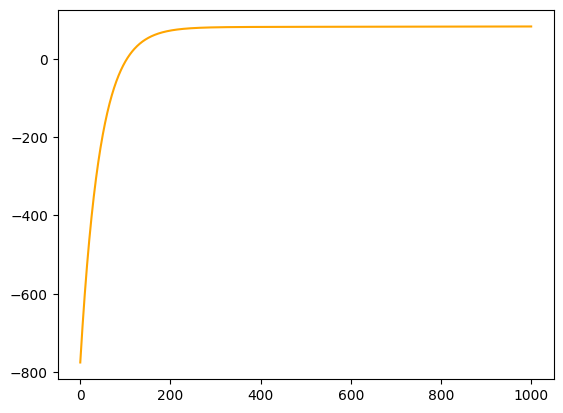

In [26]:
plt.plot(epochs, history["scores"] ,color = "orange" )
plt.show()

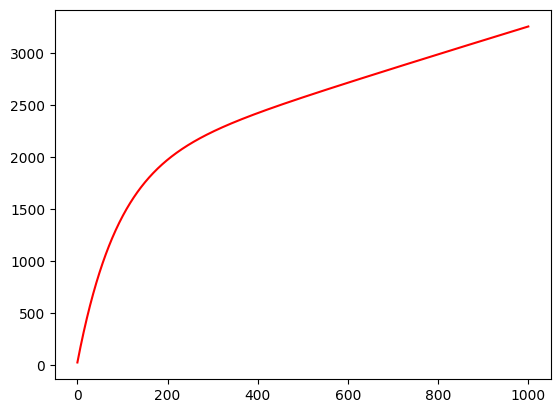

In [27]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

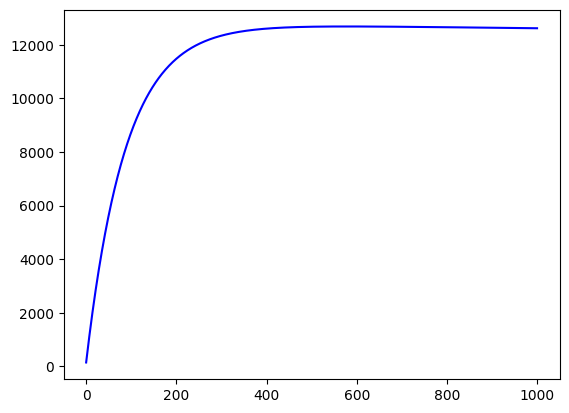

In [28]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

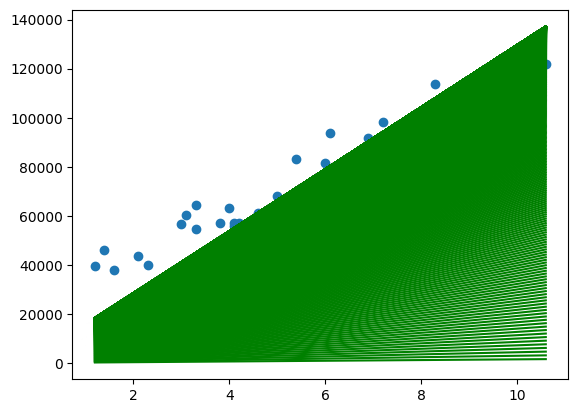

In [29]:
for i in range(epochs.shape[0]):
    y_hat = history["theta0s"][i] + history["theta1s"][i] * X
    plt.plot(X,y_hat, color = "green")
plt.scatter(X,y)
plt.show()

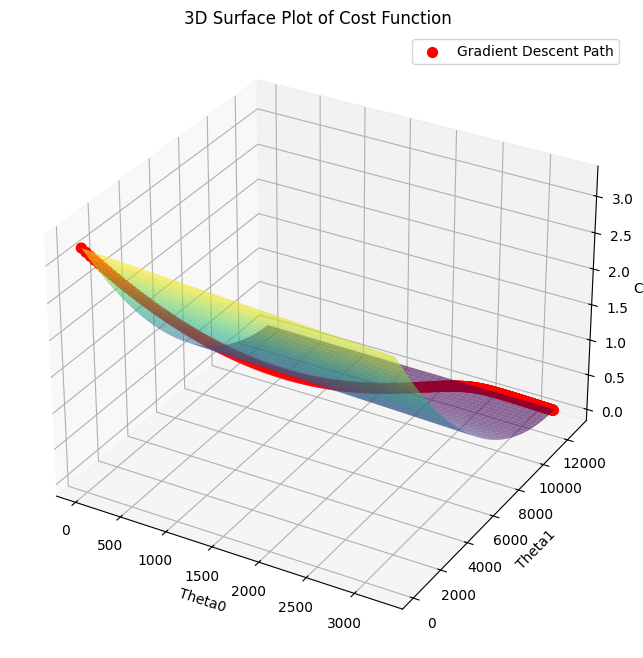

In [30]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

## Stochastic GD

In [31]:
import numpy as np

def SGD(X, y, lr=0.001, epochs=1000, show_progress=True , convergence=1e-4):
    theta0 = theta1 = 0
    theta0s, theta1s, costs, scores = [], [], [], []
    history = {}
    m = X.shape[0]

    for epoch in range(epochs + 1):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            X_example = X_shuffled[i]
            y_example = y_shuffled[i]

            y_hat = theta0 + theta1 * X_example

            grad0 = (y_hat - y_example)
            grad1 = (y_hat - y_example) * X_example

            theta0 -= lr * grad0
            theta1 -= lr * grad1

        y_hat_full = theta0 + theta1 * X
        cost = 1 / (2 * m) * np.sum((y_hat_full - y) ** 2)
        costs.append(cost)

        ss_res = np.sum((y - y_hat_full) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        scores.append(r2_score * 100)

        theta0s.append(theta0)
        theta1s.append(theta1)

        if show_progress:
            print(f"Epoch {epoch}: Cost = {cost}, theta0 = {theta0}, theta1 = {theta1}")
            print("---------------------------------------------------------------------")

        if convergence and epoch > 0 and abs(costs[-2] - costs[-1]) < convergence:
            break

    history["theta0s"] = theta0s
    history["theta1s"] = theta1s
    history["costs"] = costs
    history["scores"] = scores
    history["optimal_theta0"] = theta0
    history["optimal_theta1"] = theta1
    history["convergence_epoch"] = epoch

    return history

In [32]:
history = SGD(X, y, lr=0.0001, epochs=1000, show_progress=False)

In [33]:
history["scores"][-1]

91.2666981054153

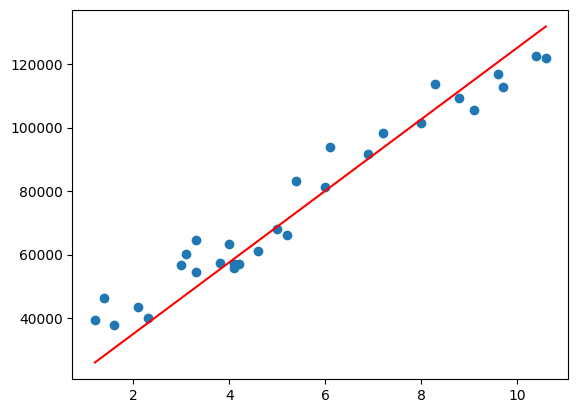

In [34]:
y_hat = history["optimal_theta0"] + history["optimal_theta1"] * X

plt.scatter(X,y)
plt.plot(X,y_hat, color = "red")
plt.show()

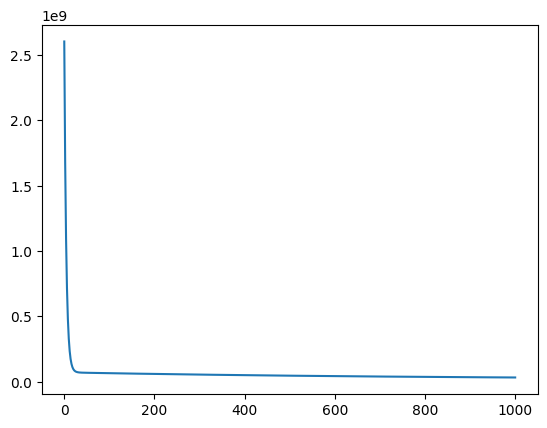

In [35]:
epochs = np.linspace(0, history["convergence_epoch"], history["convergence_epoch"] + 1)

plt.plot(epochs, history["costs"] )

plt.show()

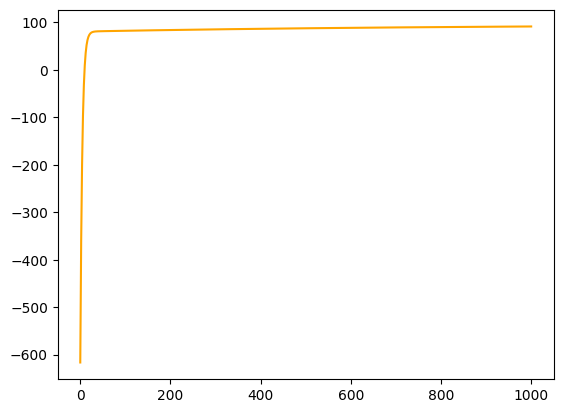

In [36]:
plt.plot(epochs, history["scores"] ,color = "orange" )

plt.show()

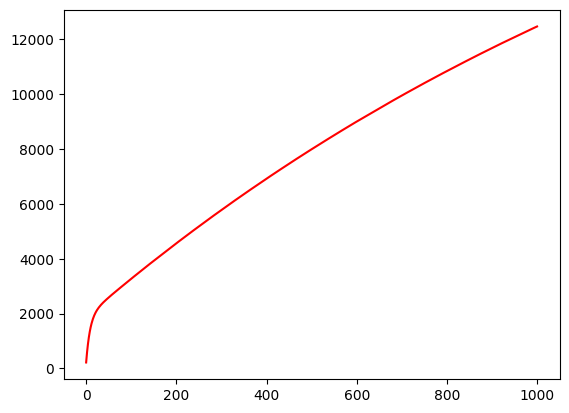

In [37]:
plt.plot(epochs, history["theta0s"] ,color = "red" )
plt.show()

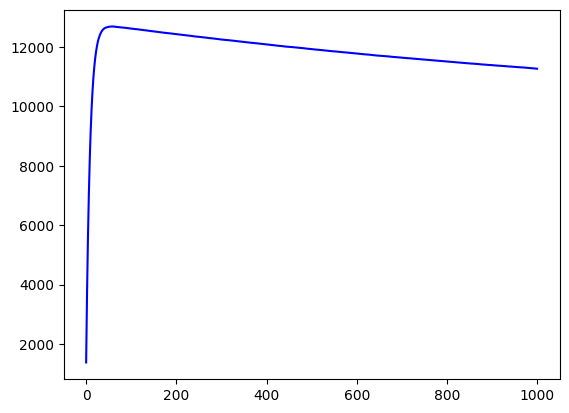

In [38]:
plt.plot(epochs, history["theta1s"] ,color = "blue" )
plt.show()

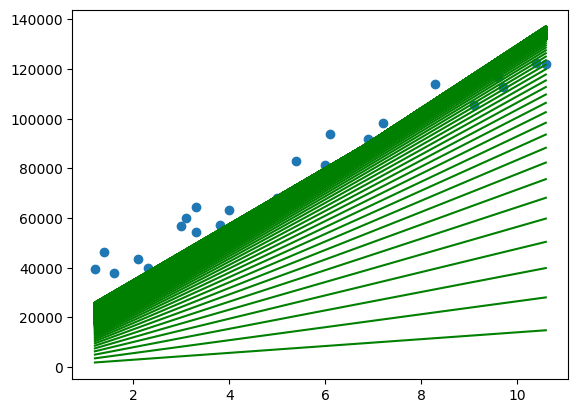

In [39]:
for i in range(epochs.shape[0]):
    y_hat = history["theta0s"][i] + history["theta1s"][i] * X
    plt.plot(X,y_hat, color = "green")
plt.scatter(X,y)
plt.show()

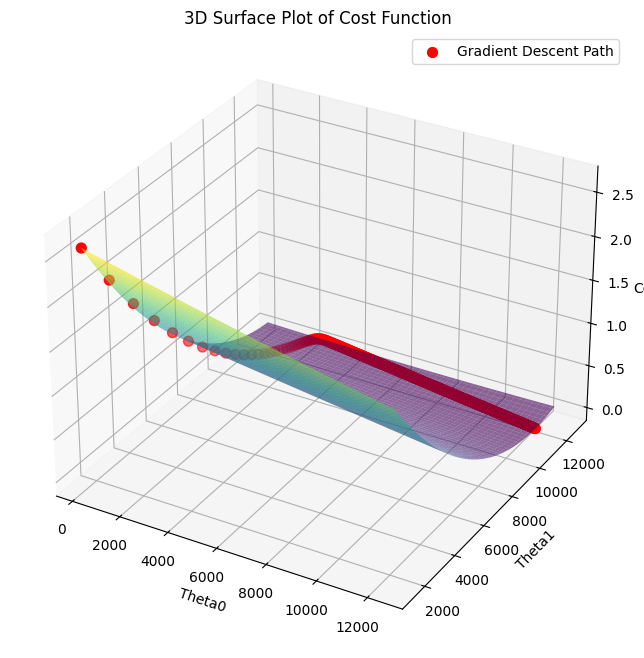

In [40]:
costs = history["costs"]
theta0s = history["theta0s"]
theta1s = history["theta1s"]

theta0_vals = np.linspace(min(theta0s) - 1, max(theta0s) + 1, 100)
theta1_vals = np.linspace(min(theta1s) - 1, max(theta1s) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s, theta1s, costs, color="red", s=50, label="Gradient Descent Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function")
plt.legend()
plt.show()

## Comparison between the 3 models

In [41]:
GD_hist = GD(X, y, lr=0.001, epochs=100, show_progress=False, convergence=None)
min_batch_hist = mini_batch_GD(X, y, lr=0.001, epochs=100, show_progress=False, convergence=None)
SGD_hist = SGD(X, y, lr=0.001, epochs=100, show_progress=False,convergence=None)

In [42]:
print(GD_hist["scores"][-1])
print(min_batch_hist["scores"][-1])
print(SGD_hist["scores"][-1])

80.68096057617164
82.23906103152258
91.36172068031736


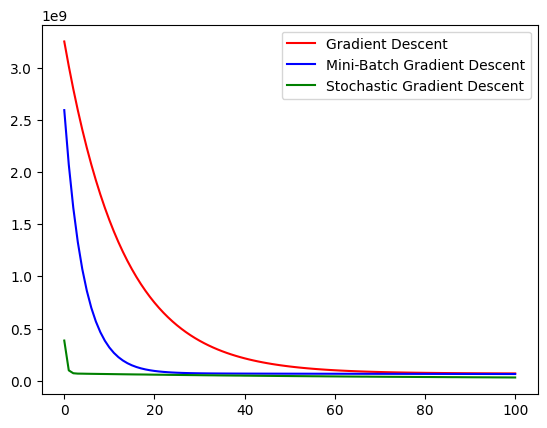

In [43]:
epoch = np.linspace(0, 100, 101)

plt.plot(epoch, GD_hist["costs"] ,color = "red" )
plt.plot(epoch, min_batch_hist["costs"] ,color = "blue" )
plt.plot(epoch, SGD_hist["costs"] ,color = "green" )
plt.legend(["Gradient Descent", "Mini-Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

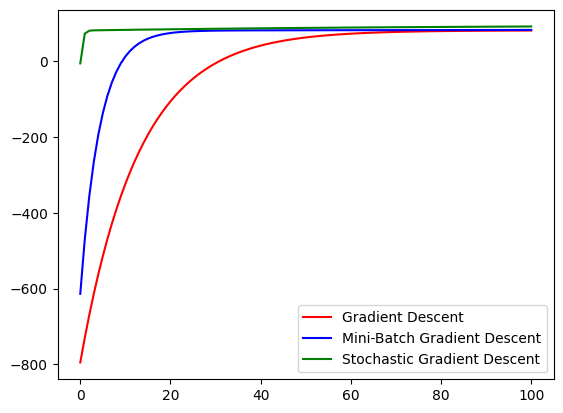

In [44]:
plt.plot(epoch, GD_hist["scores"] ,color = "red" )
plt.plot(epoch, min_batch_hist["scores"] ,color = "blue" )
plt.plot(epoch, SGD_hist["scores"] ,color = "green" )
plt.legend(["Gradient Descent", "Mini-Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

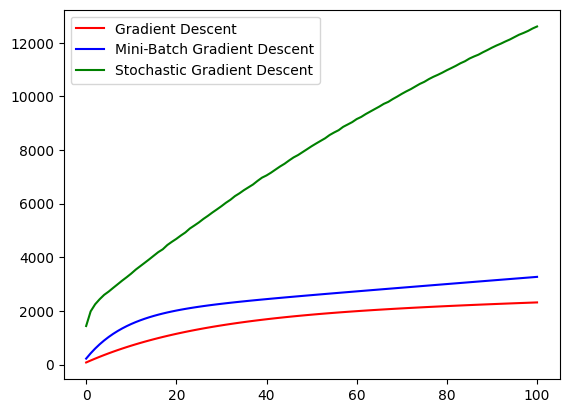

In [45]:
plt.plot(epoch, GD_hist["theta0s"] ,color = "red" )
plt.plot(epoch, min_batch_hist["theta0s"] ,color = "blue" )
plt.plot(epoch, SGD_hist["theta0s"] ,color = "green" )
plt.legend(["Gradient Descent", "Mini-Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

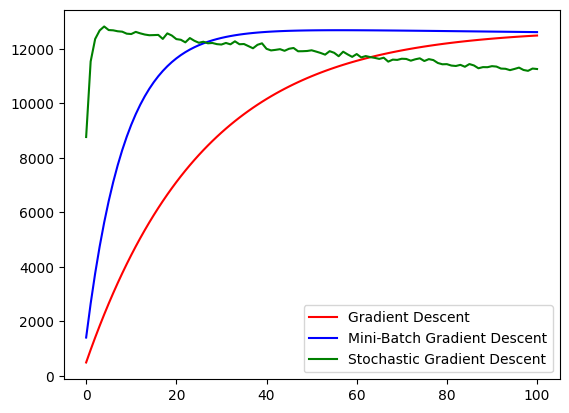

In [46]:
plt.plot(epoch, GD_hist["theta1s"] ,color = "red" )
plt.plot(epoch, min_batch_hist["theta1s"] ,color = "blue" )
plt.plot(epoch, SGD_hist["theta1s"] ,color = "green" )
plt.legend(["Gradient Descent", "Mini-Batch Gradient Descent", "Stochastic Gradient Descent"])
plt.show()

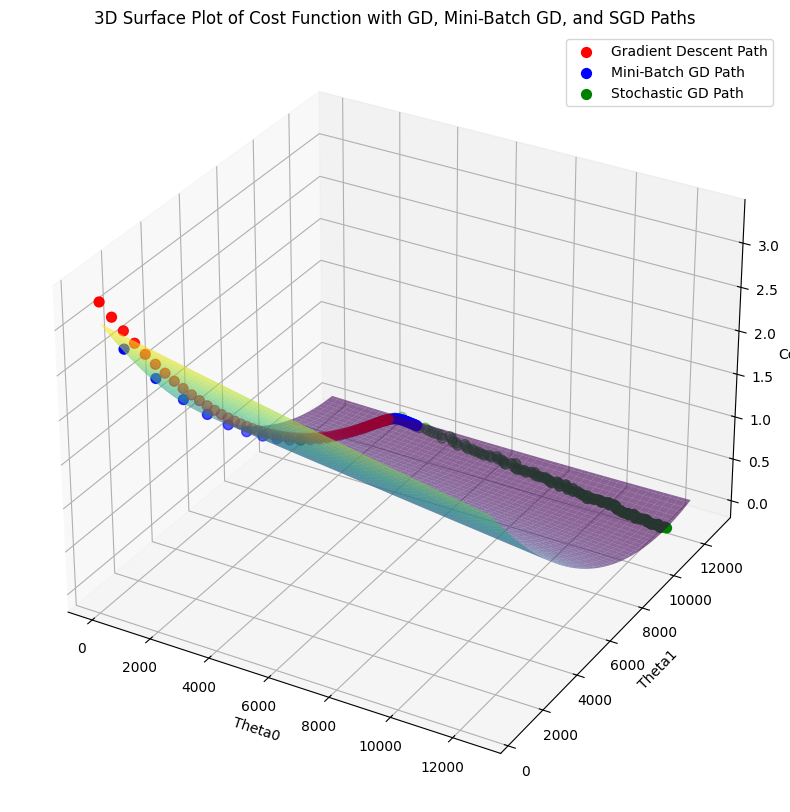

In [47]:
costs_gd = GD_hist["costs"]
theta0s_gd = GD_hist["theta0s"]
theta1s_gd = GD_hist["theta1s"]

costs_minibatch = min_batch_hist["costs"]
theta0s_minibatch = min_batch_hist["theta0s"]
theta1s_minibatch = min_batch_hist["theta1s"]

costs_sgd = SGD_hist["costs"]
theta0s_sgd = SGD_hist["theta0s"]
theta1s_sgd = SGD_hist["theta1s"]

theta0_vals = np.linspace(min(min(theta0s_gd), min(theta0s_minibatch), min(theta0s_sgd)) - 1,
                          max(max(theta0s_gd), max(theta0s_minibatch), max(theta0s_sgd)) + 1, 100)
theta1_vals = np.linspace(min(min(theta1s_gd), min(theta1s_minibatch), min(theta1s_sgd)) - 1,
                          max(max(theta1s_gd), max(theta1s_minibatch), max(theta1s_sgd)) + 1, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)
cost_grid = np.zeros_like(theta0_grid)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        y_hat = theta0_grid[i, j] + theta1_grid[i, j] * X
        cost_grid[i, j] = 1 / (2 * len(X)) * np.sum((y_hat - y) ** 2)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(theta0_grid, theta1_grid, cost_grid, cmap="viridis", alpha=0.6)
ax.scatter(theta0s_gd, theta1s_gd, costs_gd, color="red", s=50, label="Gradient Descent Path")
ax.scatter(theta0s_minibatch, theta1s_minibatch, costs_minibatch, color="blue", s=50, label="Mini-Batch GD Path")
ax.scatter(theta0s_sgd, theta1s_sgd, costs_sgd, color="green", s=50, label="Stochastic GD Path")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Cost")
ax.set_title("3D Surface Plot of Cost Function with GD, Mini-Batch GD, and SGD Paths")
plt.legend()
plt.show()